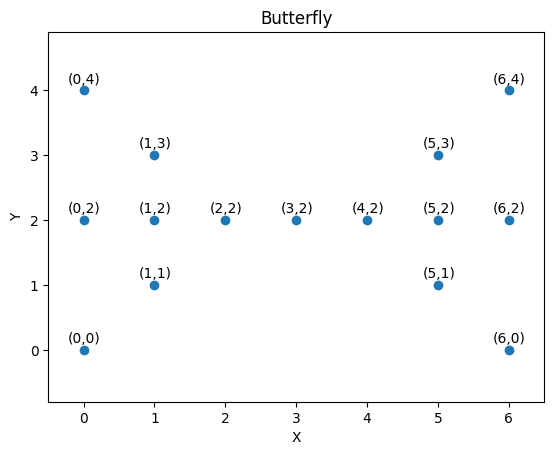

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = np.array([0, 0, 0, 1, 1, 1, 2, 3, 4, 5, 5, 5, 6, 6, 6])
Y = np.array([4, 2, 0, 3, 2, 1, 2, 2, 2, 3, 2, 1, 4, 2, 0])

data = np.array([(i, j) for i, j in zip(X, Y)])
df = pd.DataFrame(data, columns=['X', 'Y'])
df.index = np.arange(1, len(df) + 1)

plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Butterfly')
plt.axis([-.5,6.5,-.8,4.9])
for i, j in enumerate(data):
    plt.text(x=j[0]-0.22, y=j[1]+0.11, s=f'({j[0]},{j[1]})') # fontsize=8, ha='center', va='bottom')
plt.show()

Cluster labels: 
 [[1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]]
Centroids: 
 [[0.71428571 2.        ]
 [5.         2.        ]]


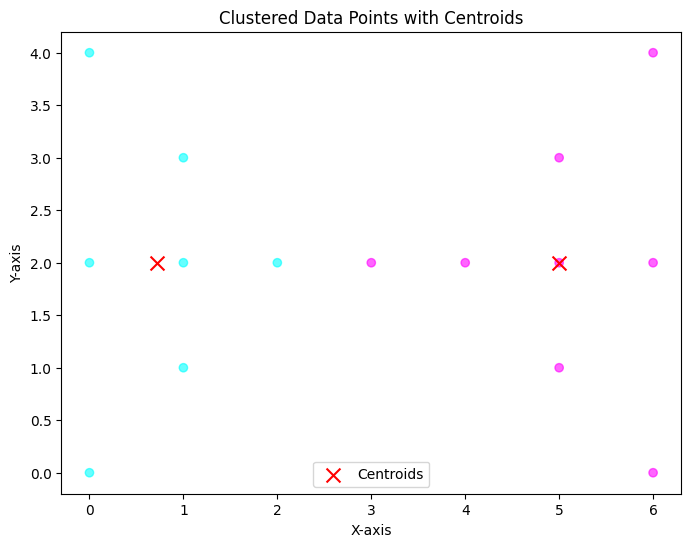

In [23]:
def hard_c_means (data,k,max_iter=100, eps=0.001):
    U = np.zeros([k,data.shape[0]])
    U[0,:] = np.random.randint(0, 2, size=data.shape[0])
    U[1,:] = 1-U[0,:]
    centroids=np.zeros((k,data.shape[1]))
    for i in range(2):
        centroids[i,:]= (np.sum((U[i,:]**m)[:,np.newaxis]*df))/(np.sum(U[i,:]**m))
    for _ in range(max_iter):
        d = np.zeros_like(U)
        for i in range(k):
            d[i,:] = np.linalg.norm(data-centroids[i,:],axis=1)
        new_U = np.zeros_like(d)
        min_indices = np.argmin(d, axis=0)
        for col,indx in enumerate(min_indices):
            new_U [indx][col] = 1
        new_centroids = np.zeros_like(centroids)
        for i in range(2):
            new_centroids[i,:]= (np.sum((new_U[i,:]**m)[:,np.newaxis]*df))/(np.sum(new_U[i,:]**m))
        if np.linalg.norm(new_centroids - centroids) < eps:
            break
        centroids = new_centroids
        U  = new_U
    return U, centroids

data = data
k = 2
m = 2
labels, centroids = hard_c_means(data, k)
print("Cluster labels:",'\n', labels)
print("Centroids:",'\n', centroids)

def plot_clusters(data, labels, centroids):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels[1:], cmap='cool', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.title('Clustered Data Points with Centroids')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

plot_clusters(data, labels, centroids)